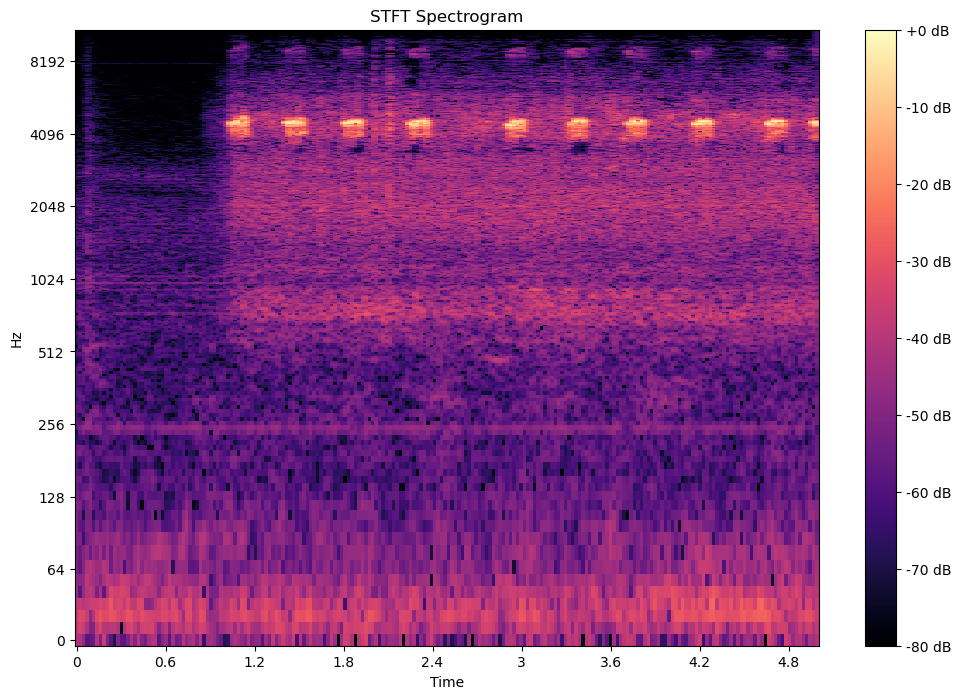

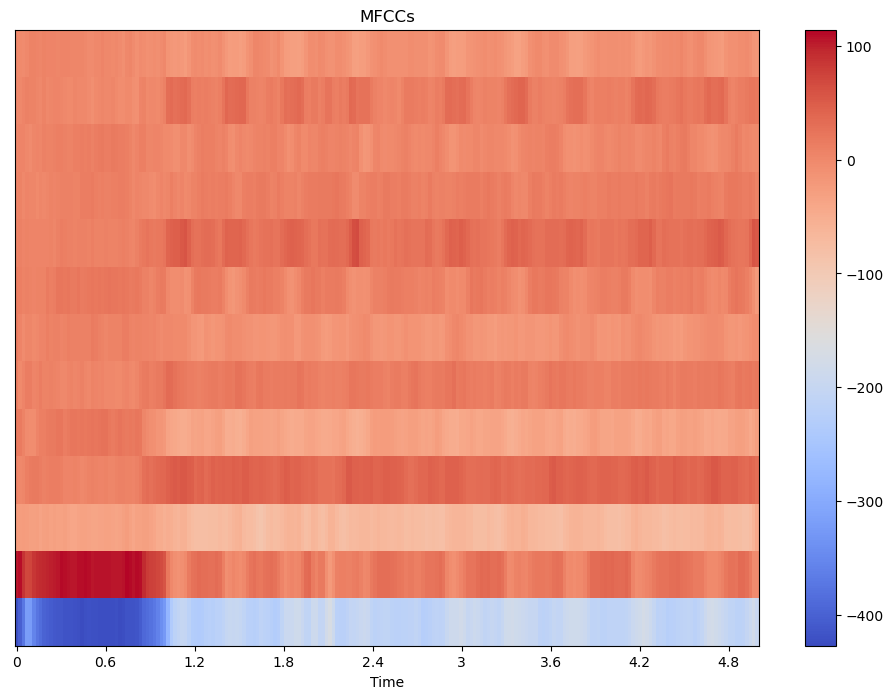

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def preprocess_and_extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # Preprocessing: Normalize the audio signal/ 
    #Normalization is to bring the audio data to a consistent level without changing its overall characteristics
    y = librosa.util.normalize(y)

    # Calculate Short-Time Fourier Transform (STFT)
    stft = librosa.stft(y)

    # Calculate Mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    return stft, mfccs

def plot_features(stft, mfccs, sr):
    # Plot STFT
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft), ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram')
    plt.show()

    # Plot MFCCs
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()

if __name__ == "__main__":
    # Replace 'your_audio_file.wav' with the path to your audio file
    audio_path = 'C:/Users/apurv/CF_Chirp.wav'

    # Preprocess and extract features
    stft, mfccs = preprocess_and_extract_features(audio_path)

    # Plot features
    plot_features(stft, mfccs, sr=librosa.get_samplerate(audio_path))


In [12]:
from sklearn.preprocessing import StandardScaler

def preprocess_and_extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # Preprocessing: Normalize the audio signal
    y = librosa.util.normalize(y)

    # Calculate Short-Time Fourier Transform (STFT)
    stft = librosa.stft(y)

    # Calculate Mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Feature Scaling
    scaler = StandardScaler()
    mfccs_scaled = scaler.fit_transform(mfccs)

    return stft, mfccs_scaled
